In [1]:
!pip install xgboost

In [2]:
!pip install lightgbm

In [3]:
### Import Neccesary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

In [4]:
pwd

'E:\\Work\\DS\\DS Test'

In [5]:
X=pd.read_csv('../DS Test/Training/X_train.csv')
y=pd.read_csv('../DS Test/Training/y_train.csv')

In [6]:
X.head()

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
0,Candidate_5926,1,0,11,31,0,False,0,True,23.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,113.39,12.0
1,Candidate_48134,1,4,2,66,2,False,1,True,11.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,262.10,17.0
2,Candidate_51717,1,0,19,2,0,False,0,True,29.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,50.29,18.0
3,Candidate_26401,1,1,16,47,1,False,4,True,17.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,126.52,27.0
4,Candidate_34872,1,1,13,1,1,True,6,True,27.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,205.47,21.0


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33050 entries, 0 to 33049
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Unique_ID  33050 non-null  object 
 1   C1         33050 non-null  int64  
 2   C2         33050 non-null  int64  
 3   C3         33050 non-null  int64  
 4   C4         33050 non-null  int64  
 5   C5         33050 non-null  int64  
 6   C6         33050 non-null  bool   
 7   C7         33050 non-null  int64  
 8   C8         33050 non-null  bool   
 9   N1         33050 non-null  float64
 10  N2         28438 non-null  float64
 11  N3         32685 non-null  float64
 12  N4         28444 non-null  float64
 13  N5         28444 non-null  float64
 14  N6         32685 non-null  float64
 15  N7         32623 non-null  float64
 16  N8         33050 non-null  int64  
 17  N9         33050 non-null  int64  
 18  N10        32623 non-null  float64
 19  N10.1      32623 non-null  float64
 20  N11   

In [8]:
y.head()

,Unique_ID,Dependent_Variable
0,Candidate_5926,1
1,Candidate_48134,0
2,Candidate_51717,1
3,Candidate_26401,0
4,Candidate_34872,0


In [9]:
print(X.shape,y.shape)

(33050, 44) (33050, 2)


In [10]:
X.describe()

,C1,C2,C3,C4,C5,C7,N1,N2,N3,N4,...,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
count,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.00000,28438.000000,32685.000000,28444.000000,...,6271.000000,6271.000000,6271.000000,6271.000000,6271.000000,6271.000000,6220.000000,33050.000000,33050.000000,32623.000000
mean,1.119818,2.403873,12.856097,14.437398,1.719395,3.124932,19.97653,81.342710,3.359361,9.574075,...,20.084197,19.512199,0.526391,0.045288,7192.813526,2379.621620,0.744373,125.629394,224.313536,19.587254
std,0.399382,3.399024,12.013457,15.527474,1.320860,2.158905,8.11087,85.397795,0.411040,5.584756,...,16.045120,15.637882,2.144069,0.443838,6460.139952,3379.065104,50.764684,104.391919,186.513844,7.352667
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,-194.000000,20.000000,0.000000,2.000000
25%,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,13.45000,21.000000,3.200000,6.000000,...,9.000000,9.000000,0.000000,0.000000,3000.000000,0.000000,-31.000000,54.000000,98.740000,14.000000
50%,1.000000,1.000000,10.000000,10.000000,2.000000,4.000000,19.27500,53.000000,3.400000,9.000000,...,15.000000,14.000000,0.000000,0.000000,5000.000000,1108.440000,0.000000,90.000000,172.600000,19.000000
75%,1.000000,3.000000,20.000000,26.000000,2.000000,4.000000,26.90000,112.000000,3.600000,13.000000,...,28.000000,27.000000,0.000000,0.000000,9500.000000,3408.750000,32.000000,160.000000,300.947500,24.000000
max,3.000000,20.000000,51.000000,67.000000,7.000000,7.000000,48.00000,755.000000,4.400000,59.000000,...,120.000000,111.000000,42.000000,11.000000,60001.000000,22586.670000,257.000000,700.000000,2153.380000,64.000000


In [11]:
X.duplicated().sum()

##Well, the function returned ‘0’. This means, there is not a single duplicate value present in our dataset and it is a very good thing to know

0

In [12]:
## A correlation between all the variables
X.corr()

,C1,C2,C3,C4,C5,C6,C7,C8,N1,N2,...,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
C1,1.000000,0.167943,0.046030,-0.004865,-0.083273,0.019266,0.039524,-0.026589,-0.035353,0.048068,...,0.005582,0.000681,0.032177,0.022640,0.074501,0.052069,-0.130032,0.099870,0.172081,-0.046019
C2,0.167943,1.000000,0.099444,-0.022996,0.081646,-0.007962,0.177221,-0.096409,0.107305,0.041715,...,0.015668,0.014511,0.014250,-0.013059,-0.024567,-0.008232,-0.041478,-0.089525,-0.069732,-0.044965
C3,0.046030,0.099444,1.000000,-0.033770,0.081265,0.101946,0.142035,-0.022252,0.036729,0.035463,...,-0.009372,-0.011123,0.007761,0.016015,-0.034000,0.002259,-0.032556,-0.017783,-0.016151,0.007418
C4,-0.004865,-0.022996,-0.033770,1.000000,-0.119557,-0.013266,-0.066296,0.035868,-0.054083,0.000132,...,-0.003096,-0.001424,-0.007812,-0.024342,0.035015,0.005713,0.011370,-0.007432,-0.010419,-0.055952
C5,-0.083273,0.081646,0.081265,-0.119557,1.000000,0.003574,0.427635,-0.284552,-0.009462,-0.057828,...,-0.008662,-0.003719,-0.033717,-0.019280,-0.096170,-0.062629,0.052815,-0.023490,-0.020385,0.086622
C6,0.019266,-0.007962,0.101946,-0.013266,0.003574,1.000000,-0.077698,0.056932,-0.123686,0.197641,...,-0.013049,-0.006906,-0.040080,-0.034777,0.170290,0.117589,-0.031972,0.200005,0.176345,0.222606
C7,0.039524,0.177221,0.142035,-0.066296,0.427635,-0.077698,1.000000,-0.101633,0.087707,-0.117521,...,-0.020074,-0.019227,-0.006192,-0.018348,-0.148935,-0.074982,-0.009766,-0.076170,-0.068221,-0.103939
C8,-0.026589,-0.096409,-0.022252,0.035868,-0.284552,0.056932,-0.101633,1.000000,-0.125038,0.055903,...,-0.008173,-0.008422,0.000789,-0.002749,0.010429,0.049260,0.060842,0.021886,-0.002231,0.023338
N1,-0.035353,0.107305,0.036729,-0.054083,-0.009462,-0.123686,0.087707,-0.125038,1.000000,0.037557,...,0.115849,0.102306,0.106446,0.069287,-0.140469,-0.065596,-0.175813,-0.197556,-0.112508,-0.051030
N2,0.048068,0.041715,0.035463,0.000132,-0.057828,0.197641,-0.117521,0.055903,0.037557,1.000000,...,0.062879,0.063673,0.006188,0.000412,0.112045,0.063745,-0.029250,0.051926,0.047421,0.316793


In [13]:
## Let's merge the data find the correlation b/w independent and dependent variables
data=pd.merge(X,y,on='Unique_ID',how='inner')

In [14]:
data.corr()['Dependent_Variable'].sort_values(ascending=False)

Dependent_Variable    1.000000
N1                    0.266740
N10.1                 0.196380
N11                   0.191514
N10                   0.181699
N31                   0.121408
N22                   0.106749
N15                   0.099403
N14                   0.094152
N18                   0.075139
N28                   0.054746
N16                   0.049168
N23                   0.049059
N12                   0.038055
N34                   0.033934
N29                   0.020979
N33                   0.014044
N35                   0.010538
C5                    0.001431
N17                   0.000480
N2                   -0.005688
C7                   -0.006676
N9                   -0.006753
C3                   -0.009858
N7                   -0.014524
C8                   -0.028673
N20                  -0.031848
C6                   -0.031891
N4                   -0.033090
N5                   -0.034303
N30                  -0.040034
N26                  -0.048571
C2      

<AxesSubplot:>

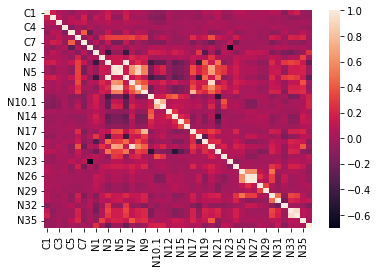

In [15]:
#Correlation plot

sns.heatmap(data.corr())

C:\Users\omk2092\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependent_Variable', ylabel='count'>

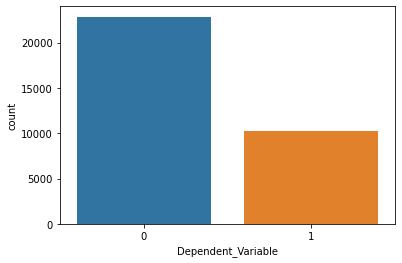

In [16]:
#Let's see the Dependent variable now.
#Plot the unique values of y

sns.countplot(y['Dependent_Variable'])

In [17]:
data['Dependent_Variable'].value_counts()
no_1 = len(data[data['Dependent_Variable'] == 1])
no_0 = len(data[data['Dependent_Variable'] == 0])
class_distribution_ratio = no_1/no_0

In [18]:
class_distribution_ratio

0.44676939240063035

In [19]:
no_1

10206

In [20]:
no_0

22844

In [21]:
X=X.drop(['Unique_ID'],axis=1)

In [22]:
y=y.drop(['Unique_ID'],axis=1)

In [23]:
## Let's see the null values distribution
X.isna().sum()

C1           0
C2           0
C3           0
C4           0
C5           0
C6           0
C7           0
C8           0
N1           0
N2        4612
N3         365
N4        4606
N5        4606
N6         365
N7         427
N8           0
N9           0
N10        427
N10.1      427
N11        716
N12       4614
N14        608
N15        427
N16       4606
N17       4606
N18       4606
N19       4571
N20       4571
N21       4571
N22       4571
N23       2486
N24          0
N25      26779
N26      26779
N27      26779
N28      26779
N29      26779
N30      26779
N31      26779
N32      26830
N33          0
N34          0
N35        427
dtype: int64

In [24]:
X.dtypes

C1         int64
C2         int64
C3         int64
C4         int64
C5         int64
C6          bool
C7         int64
C8          bool
N1       float64
N2       float64
N3       float64
N4       float64
N5       float64
N6       float64
N7       float64
N8         int64
N9         int64
N10      float64
N10.1    float64
N11      float64
N12      float64
N14      float64
N15      float64
N16      float64
N17      float64
N18      float64
N19      float64
N20      float64
N21      float64
N22      float64
N23      float64
N24      float64
N25      float64
N26      float64
N27      float64
N28      float64
N29      float64
N30      float64
N31      float64
N32      float64
N33      float64
N34      float64
N35      float64
dtype: object

In [25]:
# As seen above we have bool values ,let's convert them into their numerical representation
X["C6"] = X["C6"].astype(int)
X["C8"] = X["C8"].astype(int)

In [26]:
X.dtypes

C1         int64
C2         int64
C3         int64
C4         int64
C5         int64
C6         int32
C7         int64
C8         int32
N1       float64
N2       float64
N3       float64
N4       float64
N5       float64
N6       float64
N7       float64
N8         int64
N9         int64
N10      float64
N10.1    float64
N11      float64
N12      float64
N14      float64
N15      float64
N16      float64
N17      float64
N18      float64
N19      float64
N20      float64
N21      float64
N22      float64
N23      float64
N24      float64
N25      float64
N26      float64
N27      float64
N28      float64
N29      float64
N30      float64
N31      float64
N32      float64
N33      float64
N34      float64
N35      float64
dtype: object

In [27]:
X.isna().sum()

C1           0
C2           0
C3           0
C4           0
C5           0
C6           0
C7           0
C8           0
N1           0
N2        4612
N3         365
N4        4606
N5        4606
N6         365
N7         427
N8           0
N9           0
N10        427
N10.1      427
N11        716
N12       4614
N14        608
N15        427
N16       4606
N17       4606
N18       4606
N19       4571
N20       4571
N21       4571
N22       4571
N23       2486
N24          0
N25      26779
N26      26779
N27      26779
N28      26779
N29      26779
N30      26779
N31      26779
N32      26830
N33          0
N34          0
N35        427
dtype: int64

In [28]:
## As seen above there are many null values Let's try to impute them 
# Create our imputer to replace missing values with the mean e.g.
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X)
X=imp.transform(X)

In [30]:
X

array([[  1.  ,   0.  ,  11.  , ...,  58.  , 113.39,  12.  ],
       [  1.  ,   4.  ,   2.  , ..., 160.  , 262.1 ,  17.  ],
       [  1.  ,   0.  ,  19.  , ...,  24.  ,  50.29,  18.  ],
       ...,
       [  1.  ,   1.  ,   2.  , ...,  40.  ,  63.59,  20.  ],
       [  1.  ,   0.  ,   0.  , ...,  24.  ,  41.6 ,  17.  ],
       [  1.  ,   6.  ,   8.  , ..., 100.  , 204.1 ,  11.  ]])

In [31]:
y.head()

,Dependent_Variable
0,1
1,0
2,1
3,0
4,0


In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
### Modelling

In [34]:
m1=DecisionTreeClassifier()
m1.fit(X_train,y_train)
print(m1.score(X_test,y_test))
print(m1.score(X_train,y_train))
y_pred_1=m1.predict_proba(X_test)[:,1]
y_pred_train_1=m1.predict_proba(X_train)[:,1]
print("1==>train",roc_auc_score(y_train,y_pred_train_1))
print("1==>test",roc_auc_score(y_test,y_pred_1))

0.6511346444780636
1.0
1==>train 1.0
1==>test 0.5958175490135194


In [35]:
m2=RandomForestClassifier()
m2.fit(X_train,y_train)
print(m2.score(X_test,y_test))
print(m2.score(X_train,y_train))
y_pred_2=m2.predict_proba(X_test)[:,1]
y_pred_train_2=m2.predict_proba(X_train)[:,1]
print("2==>train",roc_auc_score(y_train,y_pred_train_2))
print("2==>test",roc_auc_score(y_test,y_pred_2))

C:\Users\omk2092\AppData\Local\Temp/ipykernel_29344/4025968584.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m2.fit(X_train,y_train)


0.7443267776096822
1.0
2==>train 1.0
2==>test 0.7593717413198616


In [36]:
m3=XGBClassifier()
m3.fit(X_train,y_train)
print(m3.score(X_test,y_test))
print(m3.score(X_train,y_train))
y_pred_3=m3.predict_proba(X_test)[:,1]
y_pred_train_3=m3.predict_proba(X_train)[:,1]
print("3==>train",roc_auc_score(y_train,y_pred_train_3))
print("3==>test",roc_auc_score(y_test,y_pred_3))

0.7387291981845688
0.8697049924357034
3==>train 0.9395850182434409
3==>test 0.7602480849558669


In [37]:
m4=LGBMClassifier()
m4.fit(X_train,y_train)
print(m4.score(X_test,y_test))
print(m4.score(X_train,y_train))
y_pred_4=m4.predict_proba(X_test)[:,1]
y_pred_train_4=m4.predict_proba(X_train)[:,1]
print("4==>train",roc_auc_score(y_train,y_pred_train_4))
print("4==>test",roc_auc_score(y_test,y_pred_4))

C:\Users\omk2092\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\omk2092\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7438729198184569
0.8040468986384266
4==>train 0.8649435297508438
4==>test 0.7691708810688065


In [38]:
##Let's try to tune xgboost model as it is giving us the best roc_auc score

import xgboost as xg
def model(xtr,ytr,xtes,ytes,maxdepth=5,lr=0.3,esti=500):
    print('max_depth :',maxdepth,'learning_rate :',lr,'n_estimators :',esti)
    xgclass=xg.XGBClassifier(use_label_encoder=False,max_depth=maxdepth,learning_rate=lr,n_estimators=esti,random_state=0
                            ,eval_metric='logloss')
    xgclass.fit(xtr,ytr)
    ytestpr=xgclass.predict(xtes)
    ytrainpr=xgclass.predict(xtr)
    ytestpr_proba=xgclass.predict_proba(xtes)
    ytrainpr_proba=xgclass.predict_proba(xtr)

    print('test score:',xgclass.score(xtes,ytes))
    print('train score:',xgclass.score(xtr,ytr))
    print('test auc score:',roc_auc_score(ytes,ytestpr_proba[:,1]))
    print('train auc score:',roc_auc_score(ytr,ytrainpr_proba[:,1]))
    return xgclass,ytestpr,ytrainpr,ytestpr_proba,ytrainpr_proba

In [39]:
mod,ytestpred,ytrainpred,ytestproba,ytrainproba=model(X_train,y_train,X_test,y_test,3,0.3,200)

max_depth : 3 learning_rate : 0.3 n_estimators : 200
test score: 0.7443267776096822
train score: 0.7930408472012103
test auc score: 0.7695863720680316
train auc score: 0.8452584611714189


In [40]:
#selected
mod,ytestpred,ytrainpred,ytestproba,ytrainproba=model(X_train,y_train,X_test,y_test,maxdepth=3,lr=0.3,esti=100)

max_depth : 3 learning_rate : 0.3 n_estimators : 100
test score: 0.7459909228441755
train score: 0.7740544629349471
test auc score: 0.7684849483066338
train auc score: 0.8175856718398781


In [41]:
mod,ytestpred,ytrainpred,ytestproba,ytrainproba=model(X_train,y_train,X_test,y_test,maxdepth=3,lr=0.2,esti=200)

max_depth : 3 learning_rate : 0.2 n_estimators : 200
test score: 0.7426626323751891
train score: 0.7793872919818456
test auc score: 0.7703338130506511
train auc score: 0.8287824294749152


In [42]:
mod,ytestpred,ytrainpred,ytestproba,ytrainproba=model(X_train,y_train,X_test,y_test,maxdepth=5,lr=0.2,esti=200)

max_depth : 5 learning_rate : 0.2 n_estimators : 200
test score: 0.7444780635400907
train score: 0.8514372163388805
test auc score: 0.7691621327529924
train auc score: 0.9197636348878295


In [43]:
#selected
m1=XGBClassifier(use_label_encoder=False,max_depth=3,learning_rate=0.3,n_estimators=100,random_state=0
                            ,eval_metric='logloss')
m1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=3, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [44]:
pd.DataFrame({'feature':data.drop(['Unique_ID','Dependent_Variable'],axis=1).columns,'Importance':m1.feature_importances_}).sort_values(by='Importance',ascending=False)

,feature,Importance
8,N1,0.157024
18,N10.1,0.059093
17,N10,0.055185
10,N3,0.053253
19,N11,0.051450
1,C2,0.048085
38,N31,0.038751
0,C1,0.037865
41,N34,0.035666
30,N23,0.027163


In [45]:
##Let's try to perform cross validation too.
crossmod=cross_val_score(m1,X_train,y_train,cv=3
                         ,scoring='roc_auc')

In [46]:
crossmod

array([0.77088991, 0.76394582, 0.77162599])

In [47]:
##As seen above crossmod scores are also perfect We can say that it is our final model which is goos to go

# Prediction From The Model

In [49]:
test_data=pd.read_csv('../DS Test/Test/X_test.csv')

In [50]:
test_data.head()

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
0,Candidate_1602,1,0,0,23,0,True,0,True,18.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,90.38,23.0
1,Candidate_29650,1,0,2,4,2,True,2,True,16.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,532.93,16.0
2,Candidate_31061,1,2,3,38,1,False,4,True,29.99,...,6.0,6.0,0.0,0.0,5000.0,4334.59,-82.0,80.0,169.78,22.0
3,Candidate_5768,1,1,28,20,2,False,2,True,17.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,270.02,13.0
4,Candidate_27059,1,1,15,1,3,False,5,False,28.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,103.41,14.0


In [51]:
test_data['C6']=test_data['C6'].astype(int)
test_data['C8']=test_data['C8'].astype(int)

In [52]:
test_data.head()

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
0,Candidate_1602,1,0,0,23,0,1,0,1,18.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,90.38,23.0
1,Candidate_29650,1,0,2,4,2,1,2,1,16.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,532.93,16.0
2,Candidate_31061,1,2,3,38,1,0,4,1,29.99,...,6.0,6.0,0.0,0.0,5000.0,4334.59,-82.0,80.0,169.78,22.0
3,Candidate_5768,1,1,28,20,2,0,2,1,17.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,270.02,13.0
4,Candidate_27059,1,1,15,1,3,0,5,0,28.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,103.41,14.0


In [53]:
test_data['Class_1_Probability']=m1.predict_proba(test_data.drop(['Unique_ID'],axis=1))[:,1]

In [54]:
test_data.head()

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N27,N28,N29,N30,N31,N32,N33,N34,N35,Class_1_Probability
0,Candidate_1602,1,0,0,23,0,1,0,1,18.00,...,NaN,NaN,NaN,NaN,NaN,NaN,50.0,90.38,23.0,0.437627
1,Candidate_29650,1,0,2,4,2,1,2,1,16.75,...,NaN,NaN,NaN,NaN,NaN,NaN,300.0,532.93,16.0,0.287929
2,Candidate_31061,1,2,3,38,1,0,4,1,29.99,...,6.0,0.0,0.0,5000.0,4334.59,-82.0,80.0,169.78,22.0,0.380659
3,Candidate_5768,1,1,28,20,2,0,2,1,17.70,...,NaN,NaN,NaN,NaN,NaN,NaN,150.0,270.02,13.0,0.428956
4,Candidate_27059,1,1,15,1,3,0,5,0,28.00,...,NaN,NaN,NaN,NaN,NaN,NaN,50.0,103.41,14.0,0.387664


In [56]:
test_data[['Unique_ID','Class_1_Probability']].to_csv('../DS Test/Test/Final_Predictions.csv',index=False)